In [69]:
!pip install statsmodels

[0.9, 1.2, 1.6, 1.9]
[78.0, 91.0]
                     df     sum_sq   mean_sq         F    PR(>F)
C(wlblP)            3.0   4.974891  1.658297  4.393127  0.012154
C(wlhlP)            1.0   0.698120  0.698120  1.849445  0.185096
C(wlblP):C(wlhlP)   3.0   0.425701  0.141900  0.375920  0.771061
Residual           27.0  10.191833  0.377475       NaN       NaN
            df     sum_sq   mean_sq         F    PR(>F)
C(wlblP)   3.0   4.974891  1.658297  4.676903  0.008756
C(wlhlP)   1.0   0.698120  0.698120  1.968910  0.171180
Residual  29.0  10.282577  0.354572       NaN       NaN
    CommunitySupport  HousingRooms wlblP wlhlP
1               92.0           1.6     1     1
2               91.0           2.2     3     0
4               93.0           2.6     3     1
5               85.0           1.2     0     0
6               89.0           1.2     0     0
7               91.0           1.4     1     0
8               95.0           1.9     2     1
9               92.0           1.6     1 

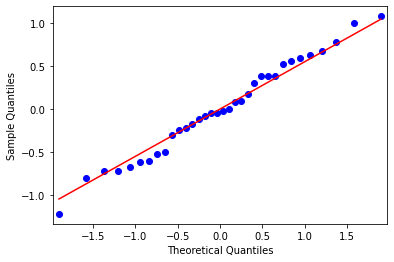

wlblP,0,1,2,3
CommunitySupport,,,,
80.0,1,0,0,0
81.0,1,0,0,0
85.0,1,0,0,0
86.0,4,0,0,0
88.0,1,1,1,0
89.0,1,0,1,0
90.0,0,0,2,0
91.0,1,1,2,2
92.0,0,4,0,0


In [9]:
import pandas as pd
import researchpy as py
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as s
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#####KEEP CATEGORY OF INTEREST IN POS 0

##this is so close cat = ['WorkLifeBalanceLeisure','SafetyHomicide']

cat = ['CommunitySupport','HousingRooms']

def readcsv(name, cat_Type, *categories):
    df = pd.read_csv(name)


    df = df.replace(r'^\s*$', np.nan, regex=True)

    for category in categories:
        df[category] = df[category].astype(cat_Type)
        
    return df

df =readcsv('2020Data.csv',float,cat)




def percentiles(dfz,percentile,label,cat_v ,percentile_cat):
    
    percentile_label = []
    cat_Var = []

    for i in percentile:#can add bins here, for now not necessary but will allow cuts into more percentiles
         percentile_label.append(np.nanpercentile(dfz[percentile_cat],i))
    if len(percentile)==4:        
        dfz[cat_v] = pd.cut(dfz[percentile_cat],
                                 bins = [percentile_label[0],percentile_label[1],percentile_label[2],
                                         percentile_label[3],float('Inf')],
                                 labels =label, precision = 4 )
#         print(category[z])
    else:
        dfz[cat_v] = pd.cut(dfz[percentile_cat],
                                 bins = [percentile_label[0],percentile_label[1],float('Inf')],
                                 labels =label, precision = 4 )
    cat_Var.append(dfz[percentile_cat].dropna())
#         print(z)

    print(percentile_label)
    return dfz,cat_Var

df,cat_Var = percentiles(df,[0,25,50,75],[0,1,2,3],'wlblP',cat[1])
df2,cat_Var2 = percentiles(df,[0,50],[0,1],'wlhlP',cat[0])

# print(df['wlblP'])
# print(df[cat[0]])

new_df = df[[cat[0],cat[1],'wlblP','wlhlP']]
new_df = new_df.dropna()
new_df = new_df.drop(10)
wlbh13 =  new_df[cat[0]].dropna()
wlbl13 = new_df[cat[1]].dropna()

# model = ols('LifeSatisfaction ~ C(wlblP) + C(wlhlP)+C(wlblP):C(wlhlP)',data = new_df[['LifeSatisfaction','wlblP','wlhlP']]).fit()
# aov_table = anova_lm(model,typ=1)

# model1 = ols('LifeSatisfaction ~ C(wlblP) + C(wlhlP)',data = new_df[['LifeSatisfaction','wlblP','wlhlP']]).fit()
# aov_table1 = anova_lm(model1,typ=1)



# print(df['wlblP'].dropna())
# print(wlbh13)
print(aov_table)
print(aov_table1)
print(new_df)
##p val less than alpha, significant result, wlbl and wlbh have significant difference
res = model1.resid 
fig = sm.qqplot(res, line='s')
plt.show()

contigency = pd.crosstab(new_df['CommunitySupport'],new_df['wlblP'])
contigency

ValueError: 'LifeSatisfaction' is not in list

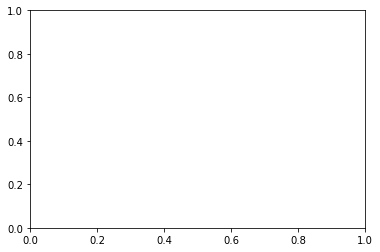

In [155]:
stats.levene(new_df[cat[2]][new_df['wlblP']==0].dropna(),
              new_df[cat[2]][new_df['wlblP']==1].dropna(),
              new_df[cat[2]][new_df['wlblP']==2].dropna(),
              new_df[cat[2]][new_df['wlblP']==3].dropna(),
              new_df[cat[2]][new_df['wlhlP']==0].dropna(),
              new_df[cat[2]][new_df['wlhlP']==1].dropna(),
              new_df[cat[2]][new_df['wlhlP']==2].dropna(),
              new_df[cat[2]][new_df['wlhlP']==3].dropna(),center = 'mean')

#same variance from levene barely



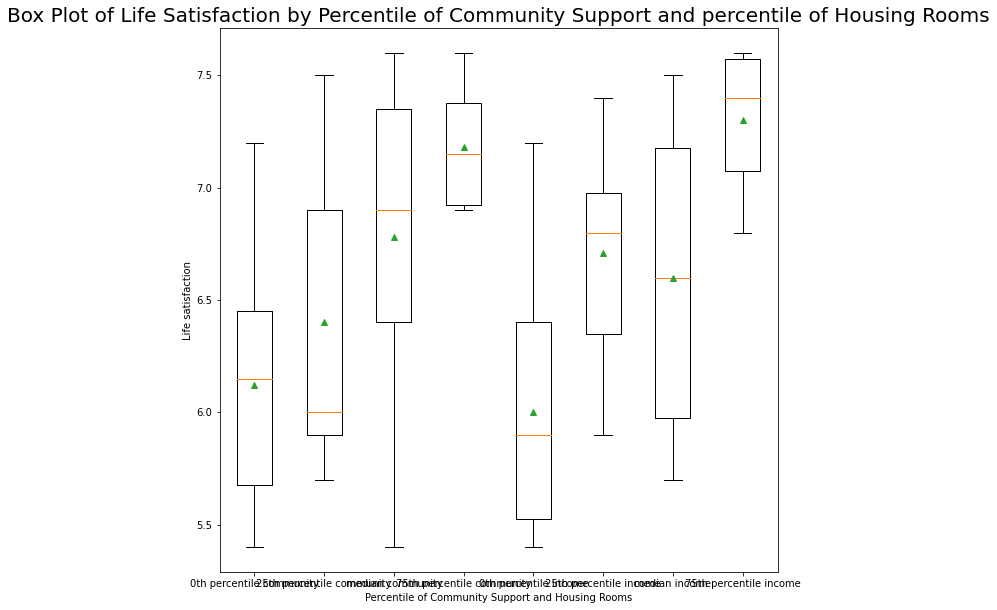

In [142]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Life Satisfaction by Percentile of Community Support and percentile of Housing Rooms", fontsize= 20)
ax.set

data = [new_df[cat[2]][new_df['wlblP']==0].dropna(),
              new_df[cat[2]][new_df['wlblP']==1].dropna(),
              new_df[cat[2]][new_df['wlblP']==2].dropna(),
              new_df[cat[2]][new_df['wlblP']==3].dropna(),
              new_df[cat[2]][new_df['wlhlP']==0].dropna(),
              new_df[cat[2]][new_df['wlhlP']==1].dropna(),
              new_df[cat[2]][new_df['wlhlP']==2].dropna(),
              new_df[cat[2]][new_df['wlhlP']==3].dropna()]

ax.boxplot(data,
           labels= ['0th percentile community', '25th percentile community', 'median community',
                    '75th percentile community', '0th percentile income', '25th percentile income'
                    ,'median income', '75th percentile income'],
           showmeans= True)

plt.xlabel("Percentile of Community Support and Housing Rooms")
plt.ylabel("Life satisfaction")

plt.show()

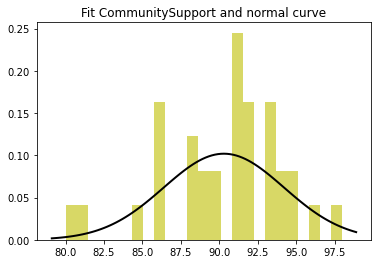

In [141]:
mu,std = stats.norm.fit(wlbh13)

plt.hist(wlbh13, bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
title = "Fit CommunitySupport and normal curve"
plt.title(title)
plt.show()

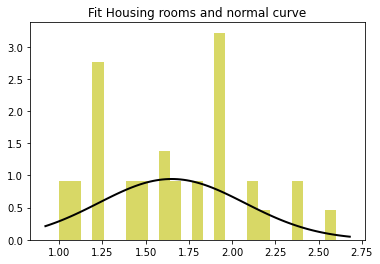

In [140]:
mu,std = stats.norm.fit(wlbl13)

plt.hist(wlbl13, bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
title = "Fit Housing rooms and normal curve"
plt.title(title)
plt.show()

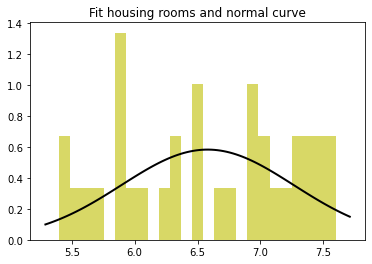

In [139]:
mu,std = stats.norm.fit(new_df[cat[2]])

plt.hist(new_df[cat[2]], bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
title = "Fit Life satisfaction and normal curve"
plt.title(title)
plt.show()

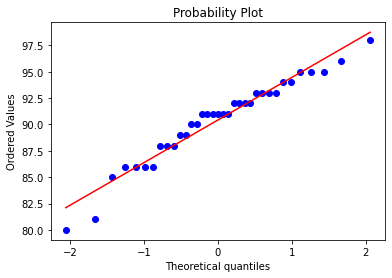

ShapiroResult(statistic=0.955682635307312, pvalue=0.16922929883003235)

In [62]:
fig = plt.figure()
ax=fig.add_subplot(111)
res = stats.probplot(new_df[cat[0]],plot=ax)
plt.show()
stats.shapiro(new_df[cat[0]])

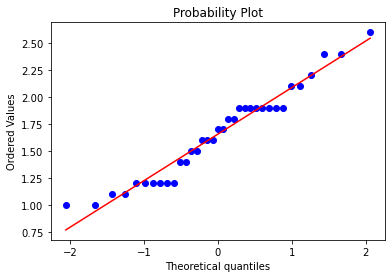

ShapiroResult(statistic=0.9514173269271851, pvalue=0.1252715140581131)

In [63]:
fig = plt.figure()
ax=fig.add_subplot(111)
res = stats.probplot(new_df[cat[1]],plot=ax)
plt.show()
stats.shapiro(new_df[cat[1]])

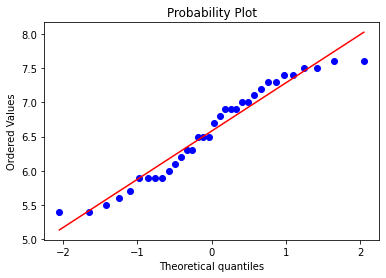

ShapiroResult(statistic=0.940391480922699, pvalue=0.06332730501890182)

In [136]:
fig = plt.figure()
ax=fig.add_subplot(111)
res = stats.probplot(new_df[cat[2]],plot=ax)
plt.show()
stats.shapiro(new_df[cat[2]])